In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./dataset/label지정.csv', encoding='CP949')
df

,회사명,거래소코드,회계년도_x,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,2016,12,0
10481,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,2017,12,0
10482,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,2018,12,0
10483,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,2019,12,0


## 데이터 윈저라이징

In [3]:
df_1 = df.copy()
df_1.drop(['회사명', '거래소코드', '회계년도_x', '상장일', '상장폐지일', '산업명', '소속코드','year', 'month'],axis=1,inplace=True)
for col in df_1.columns:
    df_1[col] = winsorize(df_1[col], limits= 0.01)

In [ ]:
import 

# 로지스틱 회귀분석 시행

## 회귀분석을 위한 다중공선성 측정

In [4]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

print(vif(df_1))

    VIF Factor          features
0   125.720688          [제조]유동비율
1   115.904115          [제조]당좌비율
2    96.978834      [제조]순운전자본회전률
3    95.932940        [제조]총자본회전률
4    76.497482       [제조]유동자산회전률
5    72.048458      [제조]유동자산구성비율
6    53.982264      [제조]자기자본구성비율
7    42.300010       [제조]노동소득분배율
8    31.020326         [제조]비유동비율
9    30.201070         [제조]자본분배율
10   28.058706       [제조]당좌자산회전률
11   26.427042          [제조]부채비율
12   23.554191       [제조]자기자본회전률
13   20.873378       [제조]순운전자본비율
14   14.696298       [제조]총자본순이익률
15   14.435192         [제조]부가가치율
16   13.099139       [제조]총자본투자효율
17   12.307307         [제조]이윤분배율
18   11.386549       [제조]매출액순이익률
19    8.817343      [제조]비유동자산회전률
20    8.201329        [제조]총자본증가율
21    7.648285      [제조]자기자본순이익률
22    6.163961      [제조]매출채권회전기간
23    5.023073      [제조]재고자산회전기간
24    4.940381       [제조]유동자산증가율
25    4.854302      [제조]총자본사업이익률
26    4.049917      [제조]매입채무회전기간
27    3.747424        [제조]자기자본배율
28    3.584450          [제조]현금비율
29    3.53

## OLS 검정

In [14]:
df_1f = df_1.drop(['label'],axis=1)

In [20]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = df_1['label']
feature = df_1f

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [24]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     20.68
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.94e-168
Time:                        16:17:42   Log-Likelihood:                 8043.9
No. Observations:               10485   AIC:                        -1.599e+04
Df Residuals:                   10436   BIC:                        -1.563e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0385      0.019     -2.017      0.044      -0.076      -0.001
[제조]매출액증가율        1.102e-05   3.01e-05      0.366      0.714    -4.8e-05       7e-05
[제조]유형자산증가율       1.254e-05   1.34e-05      0.933      0.351   -1.38e-05    3.89e-05
[제조]비유동자산증가율     -1.946e-05   3.73e-05     -0.522      0.602   -9.26e-05    5.36e-05
[제조]총자본증가율          -0.0004   8.93e-05     -4.438      0.000      -0.001      -0.000
[제조]자기자본증가율          0.0001   3.05e-05      3.958      0.000     6.1e-05       0.000
[제조]유동자산증가율       7.208e-05    4.9e-05      1.471      0.141   -2.39e-05       0.000
[제조]순이익증가율       -4.832e-07    6.3e-06     -0.077      0.939   -1.28e-05    1.19e-05
[제조]재고자산증가율      -2.939e-05   1.31e-05     -2.235      0.025   -5.52e-05   -3.61e-06
[제조]매출액총이익률       4.314e-05   7.12e-05      0.606      0.545   -9.65e-05       0.000
[제조]매출액순이익률         -0.0002   7.29e-05     -2.160      0.031      -0.000   -1.46e-05
[제조]총자본사업이익률         0.0003      0.000      1.395      0.163      -0.000       0.001
[제조]총자본순이익률         -0.0008      0.000     -2.378      0.017      -0.001      -0.000
[제조]자기자본순이익률        -0.0002      0.000     -1.929      0.054      -0.000    3.29e-06
[제조]1주당순이익        8.999e-06   1.53e-06      5.881      0.000       6e-06     1.2e-05
[제조]1주당매출액       -1.015e-07   9.58e-08     -1.060      0.289   -2.89e-07    8.63e-08
[제조]총자본회전률           0.0315      0.011      2.834      0.005       0.010       0.053
[제조]자기자본회전률         -0.0179      0.002     -7.660      0.000      -0.023      -0.013
[제조]비유동자산회전률         0.0009      0.001      0.942      0.346      -0.001       0.003
[제조]재고자산회전률       3.293e-06    4.1e-06      0.804      0.422   -4.74e-06    1.13e-05
[제조]매출채권회전률          0.0008      0.000      4.412      0.000       0.000       0.001
[제조]매입채무회전률      -1.391e-05   1.04e-05     -1.334      0.182   -3.44e-05    6.53e-06
[제조]매입채무회전기간         0.0001   5.39e-05      2.655      0.008    3.75e-05       0.000
[제조]재고자산회전기간     -4.086e-05   3.25e-05     -1.259      0.208      -0.000    2.28e-05
[제조]매출채권회전기간         0.0001   3.26e-05      3.356      0.001    4.55e-05       0.000
[제조]1회전기간            0.0151      0.037      0.408      0.683      -0.057       0.088
[제조]운전자본회전률          0.0020      0.003      0.785      0.432      -0.003       0.007
[제조]순운전자본회전률         0.0212      0.010      2.187      0.029       0.002       0.040
[제조]유동자산회전률         -0.0067      0.005     -1.406      0.160      -0.016       0.003
[제조]당좌자산회전률         -0.0030      0.002     -1.465      0.143      -0.007       0.001
[제조]유동비율          5.537e-05   2.68e-05      2.064      0.039    2.79e-06       0.000
[제조]당좌비율         -2.827e-05    2.9e-05     -0.975      0.330   -8.51e-05    2.86e-05
[제조]현금비율         -7.328e-06   1.55e-05     -0.474      0.636   -3.77e-05     2.3e-05
[제조]부채비율             0.

In [59]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(10,10))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(df_1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]자기자본회전률', '[제조]매출채권회전률', '[제조]매입채무회전기간',
       '[제조]매출채권회전기간', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]부채비율',
       '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]총자본투자효율']], df_1['label'])

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     58.32
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          7.75e-159
Time:                        16:43:30   Log-Likelihood:                 7961.3
No. Observations:               10485   AIC:                        -1.589e+04
Df Residuals:                   10470   BIC:                        -1.578e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0059      0.005      1.234   

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


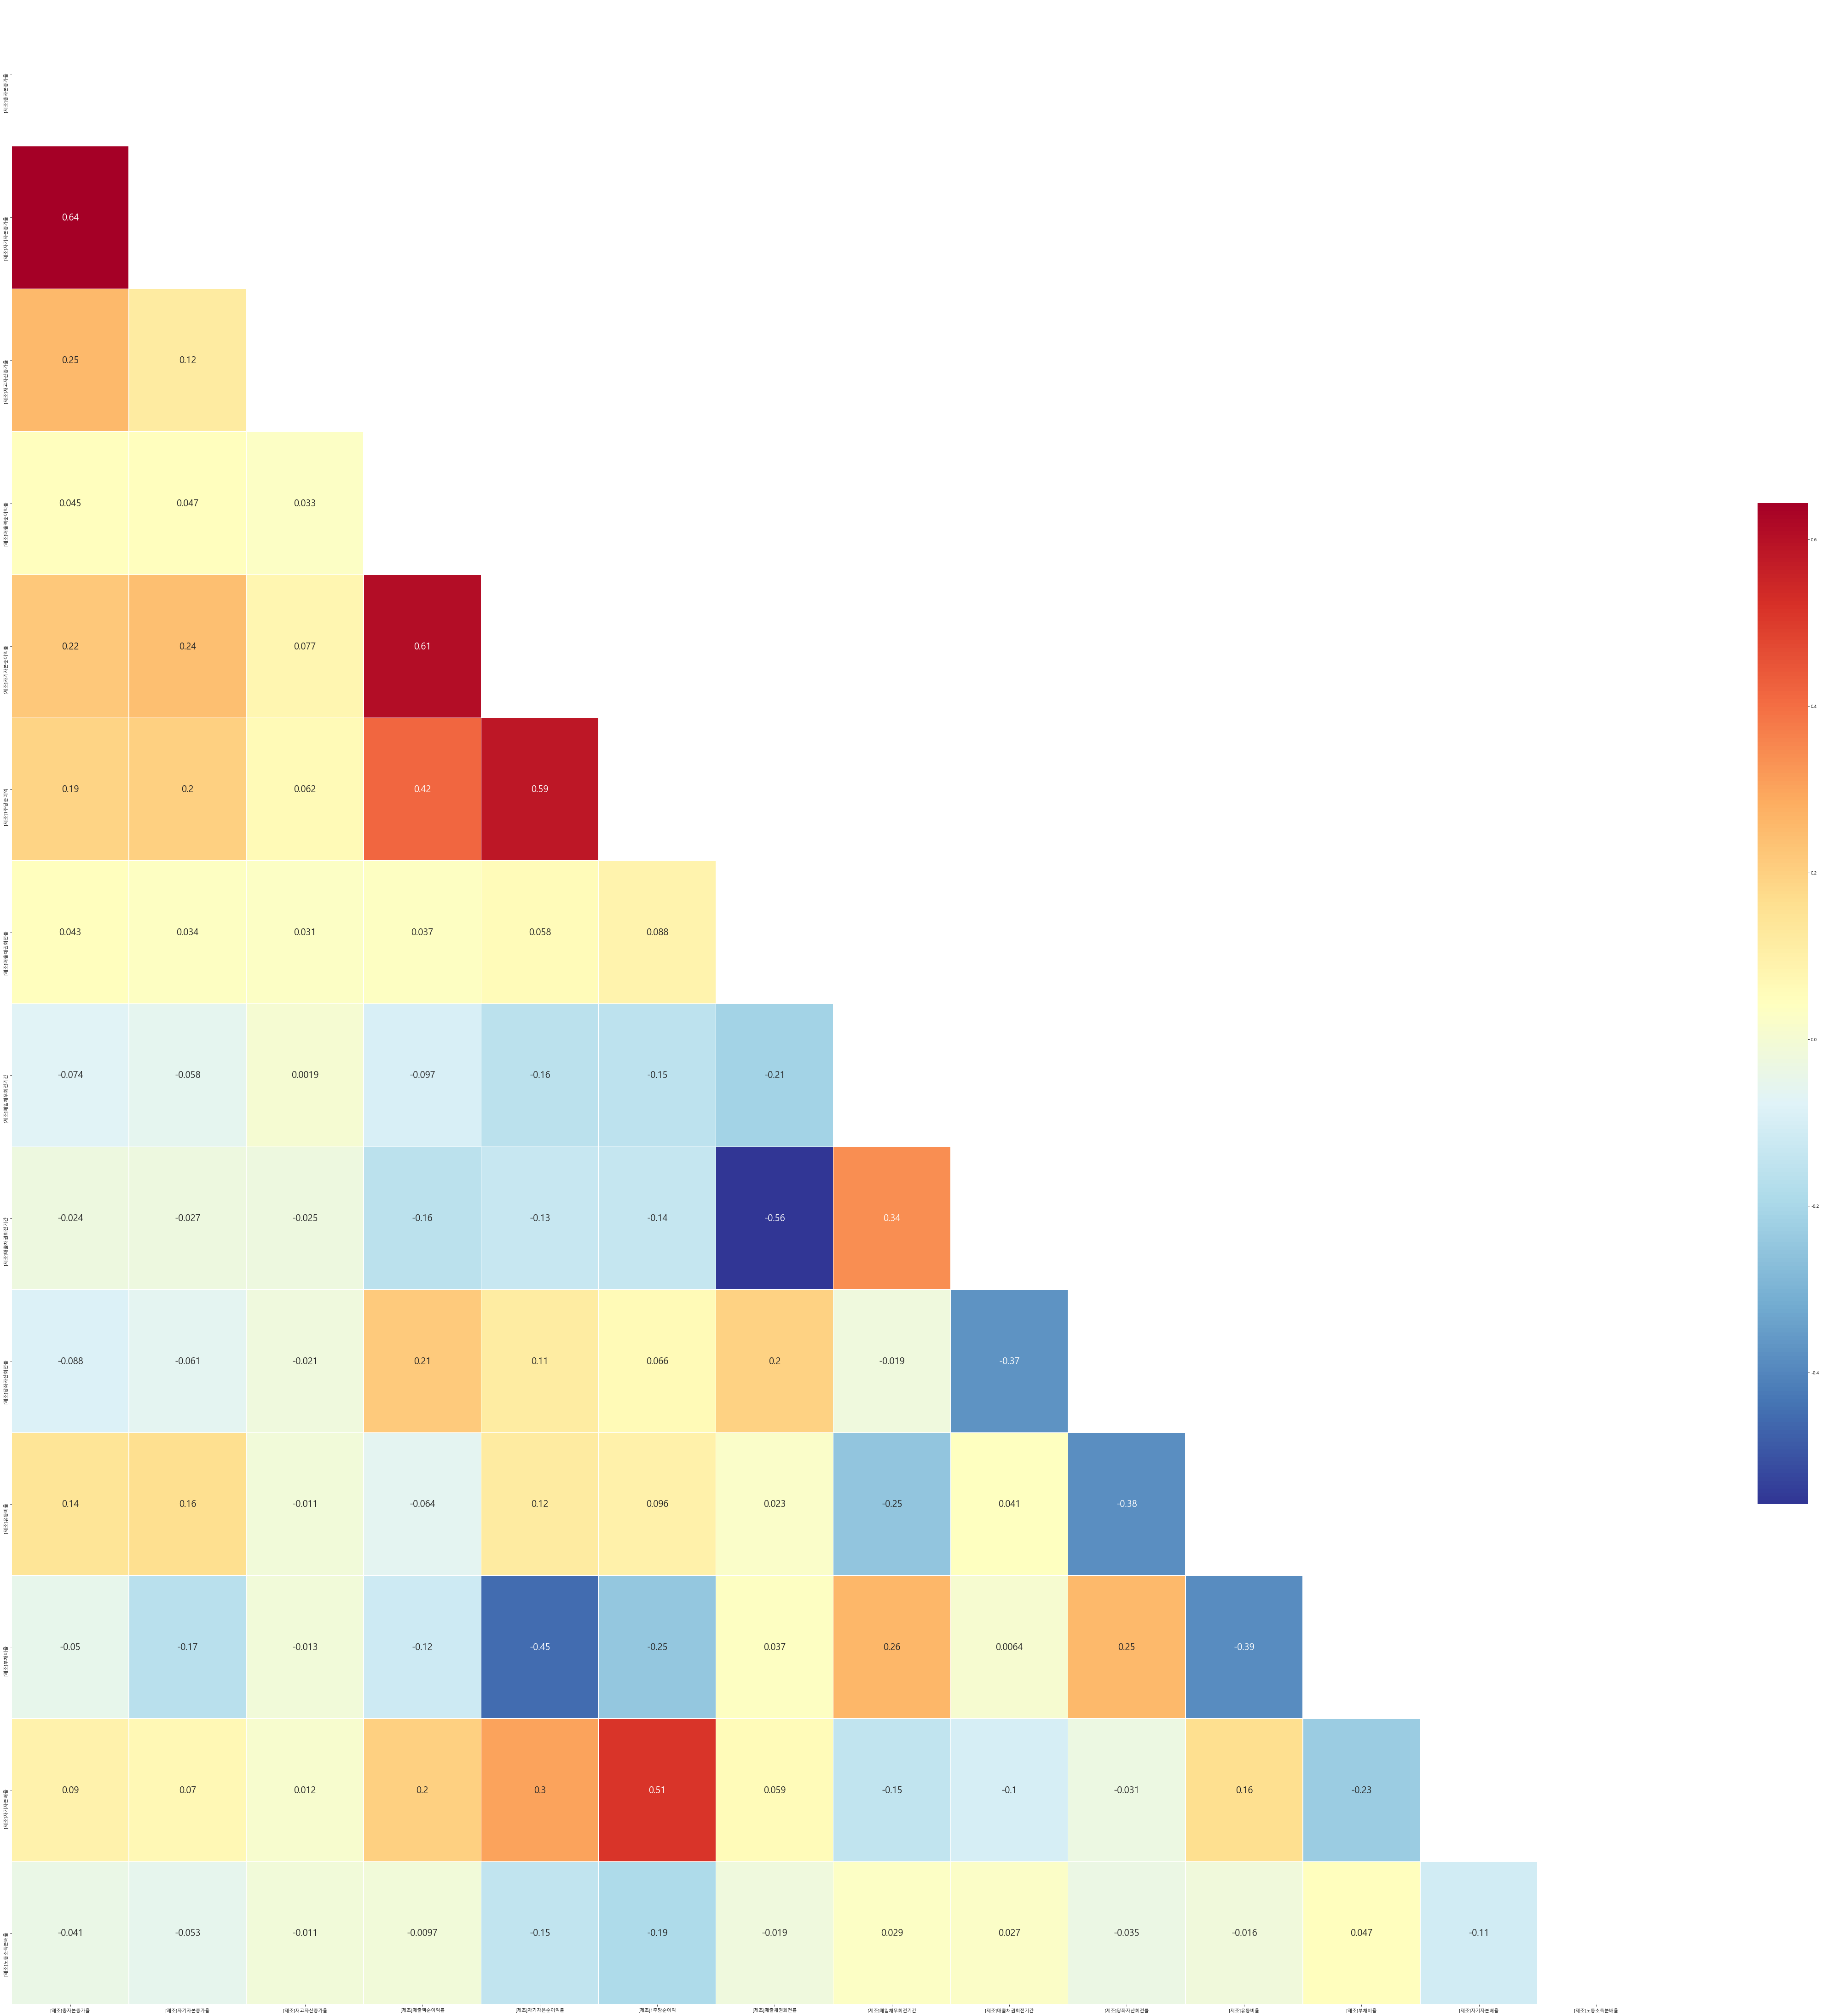

In [47]:
# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]재고자산증가율', '[제조]매출액순이익률',
 '[제조]자기자본순이익률', '[제조]1주당순이익',
 '[제조]매출채권회전률', '[제조]매입채무회전기간', '[제조]매출채권회전기간', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]부채비율',
'[제조]자기자본배율',
'[제조]노동소득분배율']])

In [61]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]자기자본회전률', '[제조]매출채권회전률', '[제조]매입채무회전기간',
       '[제조]매출채권회전기간', '[제조]유동비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율',
       '[제조]총자본투자효율']])

,VIF Factor,features
0,5.180203,[제조]부채비율
1,4.614002,[제조]자기자본회전률
2,4.528326,[제조]순운전자본비율
3,3.963077,[제조]총자본투자효율
4,3.942594,[제조]매출채권회전기간
5,3.520965,[제조]유동비율
6,3.159570,[제조]매입채무회전기간
7,3.073342,[제조]자기자본순이익률
8,2.551376,[제조]자기자본배율
9,2.175152,[제조]매출채권회전률
